Nama : Florian Natanael Manafe

NIM : 202201001

Prodi : Sistem Informasi (A)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
dataset = pd.read_csv('/content/Salary_Data2.csv')

In [70]:
target_column_name = dataset.columns[-1]
dataset.dropna(subset=[target_column_name], inplace=True)

In [71]:
x = dataset.iloc[:, [0, 5]].values
y = dataset.iloc[:, -1].values

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [73]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [74]:
print(x_test)

[[ 3.18210262  1.59206487]
 [-0.61149716 -0.87111871]
 [-0.74231095 -0.96585654]
 ...
 [ 2.13559233  1.49732704]
 [ 0.04257176 -0.30269173]
 [-0.08824202 -0.77638088]]


In [75]:
print(x_train)

[[-0.87312474 -0.68164305]
 [-0.21905581  0.07625959]
 [ 0.56582691  0.45521091]
 ...
 [ 2.78966126  1.78154053]
 [ 0.69664069  0.37663535]
 [ 0.95826826  1.59206487]]


In [76]:
print(y_test)

[200000.  70000.  65000. ... 195000. 100000.  75000.]


In [77]:
print(y_train)

[ 80000. 120000. 140000. ... 210000. 135853. 200000.]


In [78]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [79]:
y_pred = classifier.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  1]]


In [81]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_pred)
print (akurasi)

0.9546268656716418


<ipython-input-82-35592a97b903>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


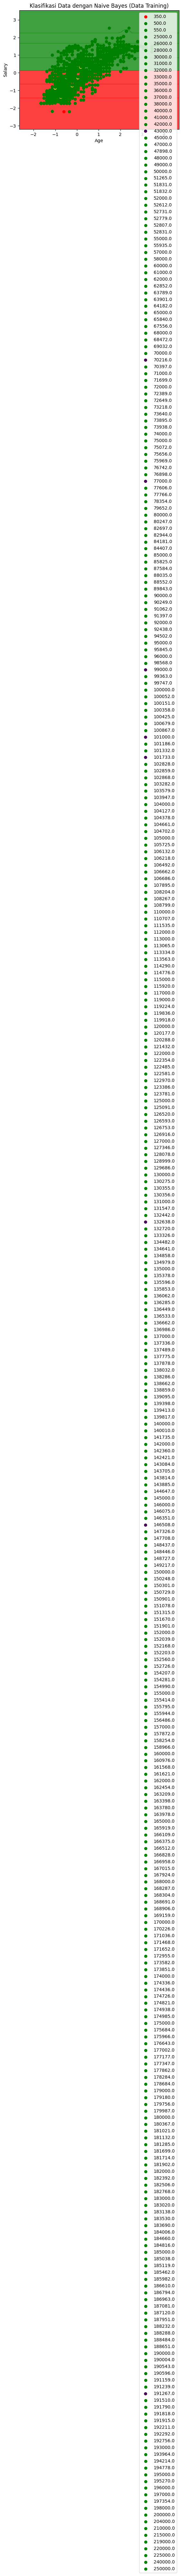

In [82]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

<ipython-input-83-cfc4272df3b5>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


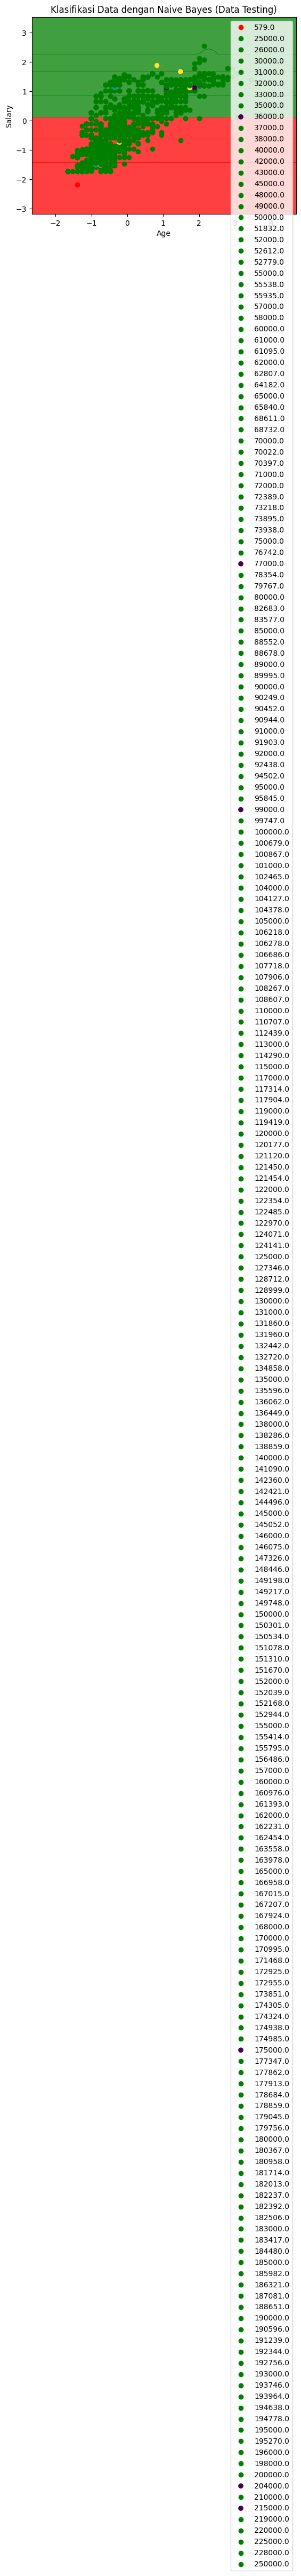

In [83]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()